In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("Bundesliga_Results.csv")
len(data)
data.head(20)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94
5,D1,7/8/1993,Leipzig,Dresden,3,3,D,NaN,NaN,NaN,1993-94
6,D1,7/8/1993,M'Gladbach,Ein Frankfurt,0,4,A,NaN,NaN,NaN,1993-94
7,D1,7/8/1993,Wattenscheid,Schalke 04,3,0,H,NaN,NaN,NaN,1993-94
8,D1,7/8/1993,Werder Bremen,Stuttgart,5,1,H,NaN,NaN,NaN,1993-94
9,D1,14/08/93,Dresden,Duisburg,0,1,A,NaN,NaN,NaN,1993-94


In [74]:
#Jaki jest współczynnik zwycięstw zespołu gospodarzy?

# Liczba wszystkich meczy
n_matches = data.shape[0]

# Wyliczona liczba -1 dlatego że jedną zapiszemy jako zmienną celu (zwycięstwo/porażka/remis) - do wytrenowania modelu
n_features = data.shape[1] - 1

# mecze wygrane przez gospodarzy
n_homewins = len(data[data.FTR == 'H'])

# współczynnik zwycięstw gospodarzy
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print wynikow
print ("Liczba wszystkich meczy: {}".format(n_matches))
print ("Liczba zmiennych: {}".format(n_features))
print ("Mecze wygrane przez gospodarzy: {}".format(n_homewins))
print ("Współczynnik zwycięstw gospodarzy: {:.2f}%".format(win_rate))

Liczba wszystkich meczy: 7650
Liczba zmiennych: 10
Mecze wygrane przez gospodarzy: 3587
Współczynnik zwycięstw gospodarzy: 46.89%


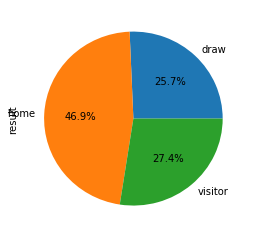

In [27]:
data['result'] = 'draw'
data.loc[data['FTHG'] > data['FTAG'], 'result'] = 'home'
data.loc[data['FTAG'] > data['FTHG'], 'result'] = 'visitor'
data.groupby('result')['result'].count()

data.groupby('result')['result'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))

In [37]:
# How many home and visitor wins added as new columns
data = data.merge(pd.get_dummies(data['result']), left_index=True, right_index=True)
data['home_wins_this_season'] = data.groupby(['Season','HomeTeam'])['home'].transform('sum')
data['visitor_wins_this_season'] = data.groupby(['Season','AwayTeam'])['visitor'].transform('sum')

KeyError: 'result'

In [38]:
# Które zespoły średnio wygrały najwięcej gier jako gospodarze
(
    data.groupby(['HomeTeam'])['home_wins_this_season']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)

KeyError: 'Column not found: home_wins_this_season'

In [47]:
# Które zespoły średnio wygrały najwięcej gier jako goście
(
    data.groupby(['AwayTeam'])['visitor_wins_this_season']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)

KeyError: 'Column not found: visitor_wins_this_season'

In [72]:
#dot plot of wins per team per home/away
data.loc[data['FTAG'] > data['FTHG'], 'result'] = 'visitor'

visitor_results = (data
                   .groupby(['Season', 'AwayTeam'])['visitor']
                   .sum()
                   .reset_index()
                   .rename(columns={'AwayTeam': 'team',
                                    'visitor': 'visitor_wins'}))

home_results = (data
                 .groupby(['Season', 'HomeTeam'])['home']
                 .sum()
                 .reset_index()
                 .rename(columns={'HomeTeam': 'team',
                                  'home': 'home_wins'}))

wins_per_season = visitor_results.merge(home_results, on=['Season', 'team'])
wins_per_season['total_wins'] = wins_per_season['visitor_wins'] + wins_per_season['home_wins']



sns.set(style="whitegrid")
wps = wins_per_season.groupby(['team'])['total_wins','home_wins','visitor_wins'].sum().reset_index()
g = sns.PairGrid(wps.sort_values("total_wins", ascending=False),
                 x_vars=wps.columns[1:], y_vars=["team"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Wins", ylabel="")

# Add titles for the columns
titles = ["Total Wins", "Home Wins", "Away Wins"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

KeyError: 'Column not found: visitor'

In [17]:

import pandas as pd

#wynik/output (zmienna celu) ma tylko limitowaną liczbę możliwych wartości
#Regresja logistyczna jest używana, gdy zmienna celu ma charakter kategoryczny
#win/lose/draw - więc pasuje do naszego przypadku
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from IPython.display import display
%matplotlib inline

ImportError: No module named xgboost

In [ ]:
data=pd.read_csv("Bundesliga_Results.csv")
display(data.head())

In [18]:
#Przygotowywanie danych
#Podzielenie na "feature" (input) i zmienną celu
#FTR - Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standaryzacja danych
from sklearn.preprocessing import scale

#Wyśrodkuj do średniej i składowej skali do wariancji jednostki.
cols = [['FTHG','FTAG','HTHG','HTAG','HTR']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

NameError: name 'data' is not defined

In [ ]:
#ostatnie 3 zwycięstwa dla każdej ze stron
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#chcemy mieć "continuous variable", które są integerami dla inputu, więc usuwamy "categorical variable"
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    #Inicjalizacja nowego outputu
    output = pd.DataFrame(index = X.index)

    #Badamy każdy "feature" (kolumnę) danych
    for col, col_data in X.iteritems():

        #Jeśli dane są "categorical", zamieniamy na "dummy variables"
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        #Zbieramy zmienione kolumny
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

In [13]:
from sklearn.cross_validation import train_test_split

#wymieszaj i podziel zbiór danych na treningowy i testowy zbiór
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)


ImportError: No module named cross_validation

In [12]:
#dla zmierzenia czasu treningu
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} ".format(clf.__class__.__name__)
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print f1, acc
    print "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc)
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print "F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)

In [ ]:
# Initialize two models
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ''
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ''
